## Observations and Insights 

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_resultsdf = pd.merge(study_results, mouse_metadata, on="Mouse ID", how ="outer")
# Display the data table for preview


In [77]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_resultsdf[combined_resultsdf.duplicated()]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
rows_toremove = combined_resultsdf.loc[(combined_resultsdf['Mouse ID'] == 'g989')]
rows_toremove

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_resultsdf = combined_resultsdf.loc[combined_resultsdf['Mouse ID'] != 'g989', :]
combined_resultsdf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
groups_bymouseid = combined_resultsdf.groupby(['Mouse ID'])
groups_bydrug = combined_resultsdf.groupby(['Drug Regimen'])
groups_bymouseid.count()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_mean = groups_bydrug['Tumor Volume (mm3)'].mean()
drug_median = groups_bydrug['Tumor Volume (mm3)'].median()
drug_variance = groups_bydrug['Tumor Volume (mm3)'].var()
drug_stdvariance = groups_bydrug['Tumor Volume (mm3)'].std()
drug_stderror = groups_bydrug['Tumor Volume (mm3)'].sem()
times_drugdose = groups_bydrug['Tumor Volume (mm3)'].count()
times_drugdose

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

In [8]:
summary_drugs_df = pd.DataFrame({"Mean Tumor Volume": drug_mean,
                              "Median Tumor Volume": drug_median,
                              "Tumor Volume Variance": drug_variance,
                              "Tumor Volume Std. Dev.": drug_stdvariance,
                              "Tumor Volume Std. Err.": drug_stderror})
summary_drugs_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_drugs_agg = groups_bydrug.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_drugs_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


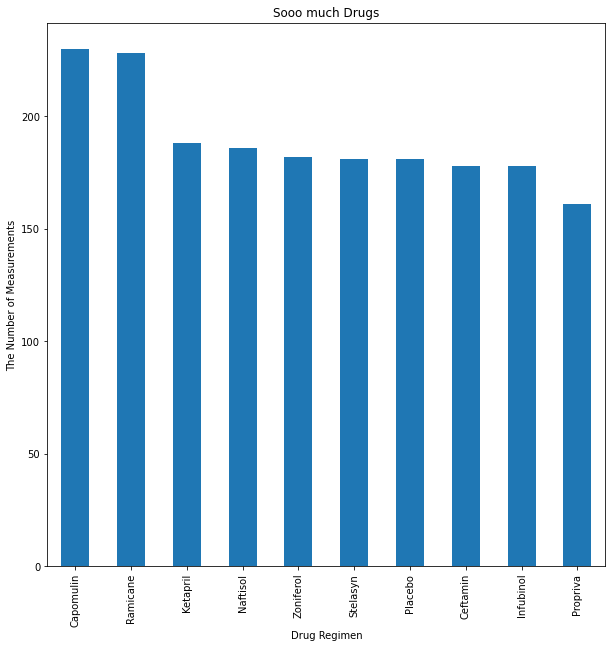

In [76]:
# Use DataFrame.plot() in order to create a bar chart of the data
doses_ofdrugs = combined_resultsdf['Drug Regimen'].value_counts()

doses_ofdrugs.plot(kind="bar", figsize=(10,10))

plt.xlabel("Drug Regimen")
plt.ylabel("The Number of Measurements")

plt.show()

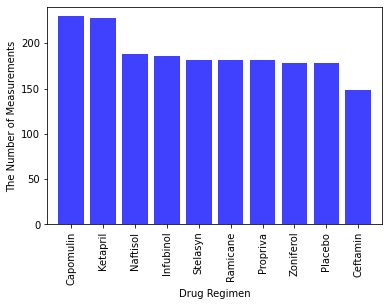

In [75]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(combined_resultsdf['Drug Regimen'].nunique())
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
plt.xlim(-0.75, len(groups_bydrug)-.25)
plt.ylim(0, max(times_drugdose) + 10)

plt.bar(x_axis, doses_ofdrugs, facecolor="blue", alpha=0.75, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("The Number of Measurements")

plt.xticks(tick_locations, combined_resultsdf['Drug Regimen'].unique(), rotation="vertical")

plt.show()

In [13]:
combined_resultsdf['Sex'].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

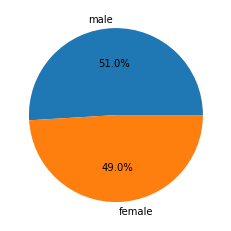

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


gender_distrub = combined_resultsdf['Sex'].value_counts()
gender_labels = ['male', 'female']

plt.pie(gender_distrub, labels=gender_labels,
        autopct="%1.1f%%")

plt.show()

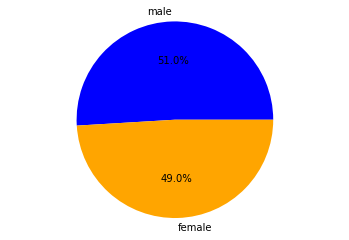

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Tell matplotlib to create a pie chart based upon the above data

my_explode = (0,0)
my_colors = ['Blue', 'Orange']

gender_distrub = combined_resultsdf['Sex'].value_counts()
gender_labels = ['male', 'female']


plt.pie(gender_distrub, explode=my_explode, labels=gender_labels, colors=my_colors,
        autopct="%1.1f%%", shadow=False, startangle=0)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

latest_timepoint = groups_bymouseid['Timepoint'].max()
combined_resultsdf = pd.merge(combined_resultsdf, latest_timepoint, on="Mouse ID", how ="outer")

In [53]:
combined_resultsdf = combined_resultsdf.rename(columns={"Timepoint_x": "Timepoint", "Timepoint_y": 
                                                        "Ending Timepoint"})


In [55]:
# Capomulin, Ramicane, Infubinol, and Ceftamin 

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
four_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_tumvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for each_drug in four_drugs:
    
    # Locate the rows which contain mice on each drug 
    holder_df = combined_resultsdf.loc[combined_resultsdf['Drug Regimen'] == each_drug]
    
    #the rows for just the max time point for each mouse on each of these four drugs 
    volume_total_df = holder_df.loc[holder_df['Timepoint'] == holder_df['Ending Timepoint']]
    
    #append the empty list with the tumor values
    values = volume_total_df['Tumor Volume (mm3)']
    drug_tumvol.append(values)
    
    # quartiles check class videos
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
   
    #print it out to check
    print(f'the lower bound for {each_drug}: {lower_bound}')
    print(f'the upper bound for {each_drug}: {upper_bound}')
    print(f'IQR for {each_drug}: {iqr}')
    
    


the lower bound for Capomulin: 20.70456164999999
the upper bound for Capomulin: 51.83201549
IQR for Capomulin: 7.781863460000004
the lower bound for Ramicane: 17.912664470000003
the upper bound for Ramicane: 54.30681135
IQR for Ramicane: 9.098536719999998
the lower bound for Infubinol: 36.83290494999999
the upper bound for Infubinol: 82.74144559000001
IQR for Infubinol: 11.477135160000003
the lower bound for Ceftamin: 25.355449580000002
the upper bound for Ceftamin: 87.66645829999999
IQR for Ceftamin: 15.577752179999997


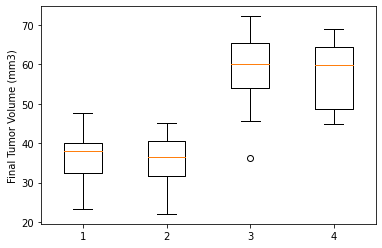

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(drug_tumvol)
plt.show()

## Line and Scatter Plots

In [54]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

find_amouse = combined_resultsdf.loc[combined_resultsdf['Drug Regimen'] == 'Capomulin']
find_amouse

mouse_cap = combined_resultsdf.loc[combined_resultsdf['Mouse ID'] == 'b128']


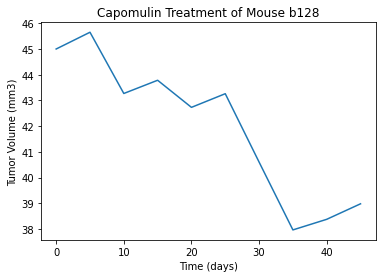

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse_cap['Timepoint'], mouse_cap['Tumor Volume (mm3)'])

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")

# Display plot
plt.show()

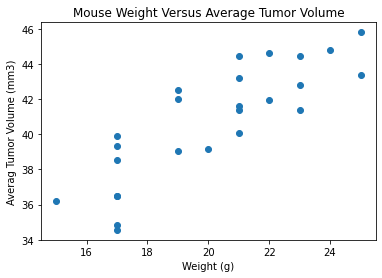

In [52]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = combined_resultsdf.loc[combined_resultsdf["Drug Regimen"] == "Capomulin",:]

fig1, ax1 = plt.subplots()
avg_cap_vol = capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'])
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

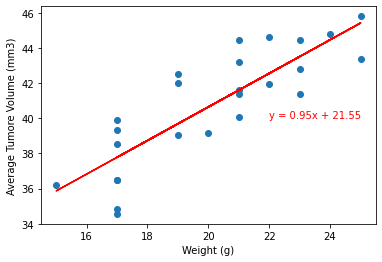

In [74]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen, can just write the same code as before 
#and add on the regression coding to the bottom

x_values = avg_cap_vol['Weight (g)']
y_values = avg_cap_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)') 
plt.ylabel('Average Tumore Volume (mm3)')
plt.annotate(line_eq,(22,40),fontsize=10,color="red")
plt.show()